RH Init 42, 0.7739560485559633, 0.4388784397520523
100%|██████████| 50000/50000 [21:31<00:00, 38.72it/s]
Average value of chosen candidate for Fair PA: 0.5548141789344121
Average value of chosen candidate for Fair IDD: 0.5529561539530803
Average value of chosen candidate for SC: 0.555214136475947
Average value of chosen candidate for EHKS: 0.5533309971493747
Average value of chosen candidate for CFHOV: 0.5511725028588945


<Figure size 1080x576 with 0 Axes>

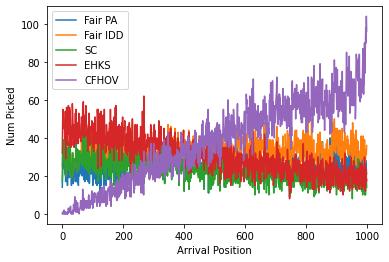

In [ ]:
import distributions as ds
import utils
import fair_prophet as fp
import unfair_prophet as ufp 
import synthetic_data as syn_data
import numpy as np
from utils import SecretaryInstance, GetThreshold, ComputeThreshold
import secretary_eval as se
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd


def ProphetExperiment(size, num_rep, distributions):
    sizes = np.ones(size)
    q = np.ones(size) / size
    
    answers = defaultdict(list)
    for _ in tqdm(range(num_rep)):
        instance = syn_data.GetProphetInput(size, distributions)
        answers['Fair PA'].append(fp.ComputeSolution(instance, distributions, q))
        answers['Fair IDD'].append(fp.ComputeSolutionIID(instance, distributions, q))
        answers['SC'].append(ufp.ComputeSolutionOneHalf(instance, distributions, q))
        answers['EHKS'].append(ufp.ComputeSolutionMinusOneE(instance, distributions, q))
        # answers['DP'].append(ufp.ComputeSolutionThreeForth(instance, distributions, q))
        answers['CFHOV'].append(ufp.ComputeSolutionDiffEq(instance, distributions, q))

    return answers


def PlotProphet(num_rep, size, distributions, file_name):
    """
    description

    args:
        num_rep (int): description of var
    
    returns:
        data (dict): description of return val
    """
    data = {}

    # Generate data for plot
    results = ProphetExperiment(size, num_rep, distributions)

    # Add results to data    
    for name, result in results.items():
        
        # Remove results where no candidate was picked
        result = list(filter(lambda val: val.color !=  -1, result) )
        result_col = [i.color for i in result]
        result_val = np.mean([i.value for i in result])
        print(f"Average value of chosen candidate for {name}: {result_val}")
        data[name] = np.histogram(result_col, np.arange(size + 1))[0]
    
    # Create plot
    plt.figure(figsize=(15, 8))
    df = pd.DataFrame.from_dict(data, orient='columns')
    ax = df.plot.line()
    ax.set_ylabel('Num Picked')
    ax.set_xlabel('Arrival Position')
    plt.savefig(file_name, bbox_inches='tight', dpi=400)
    plt.show()

    return data

num_rep = 50000
# size = 50 
# unif_dist = ds.UniformDistribution(loc=0, scale=1, n=size)
# distributions_a = [unif_dist, unif_dist]
# data = PlotProphet(num_rep, size, distributions_a, 'plots/Prophetplot_unif.png')

size = 1000
bi_dist = ds.BinomialDistribution(size, 0.5)
distributions_b = [bi_dist, bi_dist]
data = PlotProphet(num_rep, size, distributions_b, 'plots/Prophetplot_bi.png')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa043478-e839-47cf-996f-1ea34897d0a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>